In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv
/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv


## About Dataset

The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market. In this work, we present a recurrent neural network (RNN) and Long Short-Term Memory (LSTM) approach to predict stock market indices.

## 1.Libraies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM

from warnings import filterwarnings

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## 2.Data Load

In [17]:
df=pd.read_csv("/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [18]:
data = df.loc[:,["Open"]].values


train = data[:len(data)-50] 
test = data[len(train):] # last 50 data will be our test data

# reshape
train=train.reshape(train.shape[0],1)

In [19]:
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [779.8 ],
       [787.85],
       [798.24]])

## 3.Data Preprocessing

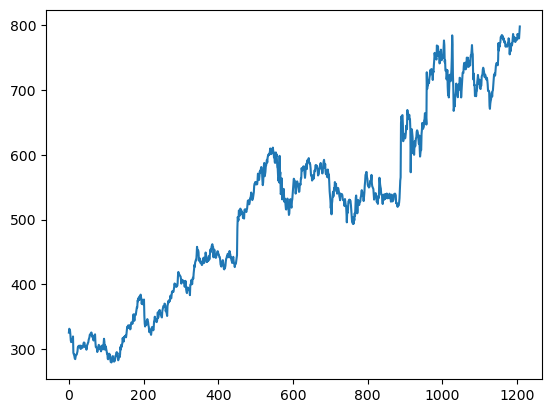

In [20]:
plt.plot(train);

In [21]:
sc=MinMaxScaler()
sc_train=sc.fit_transform(train)

In [23]:
sc_train

array([[0.08886192],
       [0.10045847],
       [0.09768454],
       ...,
       [0.96447835],
       [0.97998536],
       [1.        ]])

In [24]:
len(sc_train)

1208

In [25]:
#60 zaman adımlı ve 1 çıkışlı bir veri yapısı oluşturma

X_train = []
y_train = []
for i in range(60, 1208):
    X_train.append(sc_train[i-60:i, 0])
    y_train.append(sc_train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [26]:
# reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


### RNN modeli 

In [85]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


regressor.add(Dense(units = 1))


In [28]:
# compile

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [29]:
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
36/36 [==============================] - 12s 202ms/step - loss: 0.4213
Epoch 2/50
36/36 [==============================] - 9s 238ms/step - loss: 0.2699
Epoch 3/50
36/36 [==============================] - 8s 209ms/step - loss: 0.1917
Epoch 4/50
36/36 [==============================] - 7s 201ms/step - loss: 0.1661
Epoch 5/50
36/36 [==============================] - 7s 196ms/step - loss: 0.1200
Epoch 6/50
36/36 [==============================] - 8s 230ms/step - loss: 0.1051
Epoch 7/50
36/36 [==============================] - 7s 200ms/step - loss: 0.0824
Epoch 8/50
36/36 [==============================] - 7s 204ms/step - loss: 0.0680
Epoch 9/50
36/36 [==============================] - 7s 194ms/step - loss: 0.0590
Epoch 10/50
36/36 [==============================] - 8s 225ms/step - loss: 0.0526
Epoch 11/50
36/36 [==============================] - 7s 207ms/step - loss: 0.0412
Epoch 12/50
36/36 [==============================] - 7s 203ms/step - loss: 0.0401
Epoch 13/50
36/36 [=====

In [34]:
len(train) - len(test) - 60

1098

In [33]:
inputs = data[len(train) - len(test) - 60:]
inputs = sc.transform(inputs) 

In [ ]:
# test

In [36]:
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0]) # 0 dan 60 a, 1 den 61 e gibi kaydirarark 60 eleman aliyoruz 
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [37]:
## tahmin 

In [39]:
predicted_data = regressor.predict(X_test)
predicted_data = sc.inverse_transform(predicted_data)   # tahminlerin gerçek değerlerini görebilmek için ölçeklemeyi kaldırdık

4/4 [==============================] - 0s 20ms/step


In [40]:
predicted_data

array([[785.563  ],
       [787.13214],
       [788.578  ],
       [790.22864],
       [790.8997 ],
       [790.5442 ],
       [789.2575 ],
       [789.145  ],
       [788.3389 ],
       [786.2546 ],
       [785.38995],
       [784.288  ],
       [783.5369 ],
       [781.6409 ],
       [781.09644],
       [780.4351 ],
       [779.8889 ],
       [779.23773],
       [779.67896],
       [781.05096],
       [782.27747],
       [783.8921 ],
       [784.238  ],
       [782.7499 ],
       [781.6398 ],
       [779.8153 ],
       [778.8295 ],
       [778.52527],
       [779.724  ],
       [779.96497],
       [780.4213 ],
       [781.956  ],
       [785.3331 ],
       [787.3073 ],
       [787.577  ],
       [787.29016],
       [787.72565],
       [787.735  ],
       [787.7566 ],
       [787.6744 ],
       [786.83093],
       [787.0085 ],
       [787.56696],
       [788.028  ],
       [787.8601 ],
       [788.05493],
       [788.9    ],
       [789.0119 ],
       [788.5504 ],
       [788.95264],


In [41]:
# Görselleştirelim

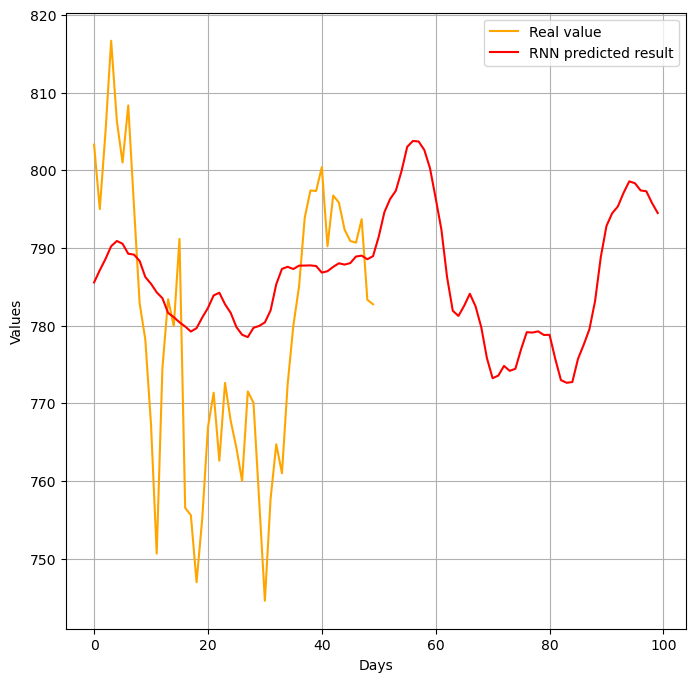

In [42]:
plt.figure(figsize=(8,8))
plt.plot(test,color="orange",label="Real value")
plt.plot(predicted_data,color="red",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

### LTSM model

In [43]:
X_train.shape

(1148, 60, 1)

In [44]:
# model1

In [57]:
model1 = Sequential()
model1.add(LSTM(10, input_shape=(None,1)))
model1.add(Dense(1))
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 10)                480       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [49]:
model1.compile(loss='mean_squared_error', optimizer='adam')


In [50]:
model1.fit(X_train, y_train, epochs=50)

Epoch 1/50
36/36 [==============================] - 2s 6ms/step - loss: 0.0365
Epoch 2/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 3/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 4/50
36/36 [==============================] - 0s 6ms/step - loss: 9.9000e-04
Epoch 5/50
36/36 [==============================] - 0s 6ms/step - loss: 9.1820e-04
Epoch 6/50
36/36 [==============================] - 0s 6ms/step - loss: 8.9784e-04
Epoch 7/50
36/36 [==============================] - 0s 6ms/step - loss: 8.6933e-04
Epoch 8/50
36/36 [==============================] - 0s 6ms/step - loss: 8.6916e-04
Epoch 9/50
36/36 [==============================] - 0s 6ms/step - loss: 8.4481e-04
Epoch 10/50
36/36 [==============================] - 0s 8ms/step - loss: 8.4474e-04
Epoch 11/50
36/36 [==============================] - 0s 6ms/step - loss: 8.2761e-04
Epoch 12/50
36/36 [==============================] - 0s 6ms/step - loss: 8.1537e-04
Epoch 13/50
3

In [52]:
predicted_model1=model1.predict(X_test)
predicted_model1=sc.inverse_transform(predicted_model1)
predicted_model1

4/4 [==============================] - 0s 3ms/step


array([[771.65283],
       [774.4285 ],
       [776.76154],
       [777.63544],
       [778.95264],
       [778.9638 ],
       [778.3052 ],
       [778.4752 ],
       [777.1736 ],
       [775.8622 ],
       [775.364  ],
       [773.6076 ],
       [771.50366],
       [770.4322 ],
       [769.3922 ],
       [768.7138 ],
       [767.58344],
       [767.3501 ],
       [768.01086],
       [768.51776],
       [770.5619 ],
       [771.6095 ],
       [770.4717 ],
       [766.25616],
       [765.79004],
       [763.73126],
       [763.08484],
       [764.11395],
       [765.3258 ],
       [765.3931 ],
       [766.5474 ],
       [769.1477 ],
       [772.5643 ],
       [774.11816],
       [773.7976 ],
       [774.4268 ],
       [775.6615 ],
       [775.2029 ],
       [774.5245 ],
       [774.4649 ],
       [775.1003 ],
       [775.36536],
       [775.7483 ],
       [775.5416 ],
       [777.6524 ],
       [778.22955],
       [778.2175 ],
       [778.4244 ],
       [778.09784],
       [779.87317],


In [53]:
### Görselleştirelim

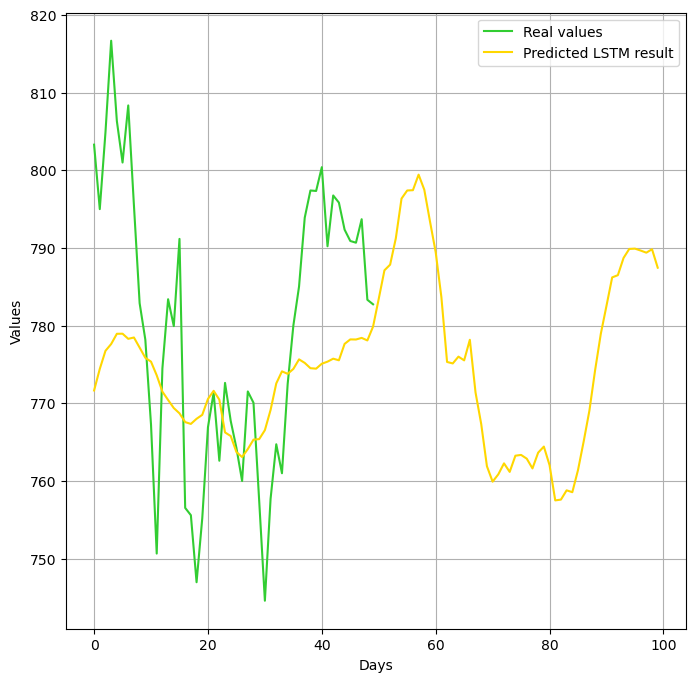

In [54]:
plt.figure(figsize=(8,8))
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_model1,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [80]:
model2 = Sequential()
model2.add(LSTM(50, input_shape=(None,1)))
model2.add(Dense(1))
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 50)                10400     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [81]:
model2.compile(loss='mean_squared_error', optimizer='adam')


In [82]:
model2.fit(X_train, y_train, epochs=50)

Epoch 1/50
36/36 [==============================] - 2s 6ms/step - loss: 0.0672
Epoch 2/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 3/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 4/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 5/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 6/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 7/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 8/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 9/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 10/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 11/50
36/36 [==============================] - 0s 6ms/step - loss: 9.7241e-04
Epoch 12/50
36/36 [==============================] - 0s 6ms/step - loss: 9.4621e-04
Epoch 13/50
36/36 [======================

In [83]:
predicted_model2=model2.predict(X_test)
predicted_model2=sc.inverse_transform(predicted_model2)
predicted_model2

4/4 [==============================] - 0s 4ms/step


array([[776.8155 ],
       [779.42566],
       [781.52386],
       [781.9896 ],
       [782.52094],
       [781.8092 ],
       [780.1987 ],
       [779.38416],
       [777.46674],
       [775.4358 ],
       [774.4024 ],
       [772.508  ],
       [770.13617],
       [768.79095],
       [767.8594 ],
       [767.4954 ],
       [766.8295 ],
       [766.97504],
       [768.2184 ],
       [769.5422 ],
       [772.3847 ],
       [774.46686],
       [773.8627 ],
       [769.0684 ],
       [766.9097 ],
       [763.95483],
       [762.51575],
       [763.44885],
       [765.3979 ],
       [766.4648 ],
       [768.2905 ],
       [771.67126],
       [776.2139 ],
       [778.9695 ],
       [779.0067 ],
       [779.0345 ],
       [779.62006],
       [778.6589 ],
       [777.12756],
       [776.1956 ],
       [776.3313 ],
       [776.55084],
       [777.0231 ],
       [776.97797],
       [779.22424],
       [780.5006 ],
       [780.8342 ],
       [781.0207 ],
       [780.5405 ],
       [782.0872 ],


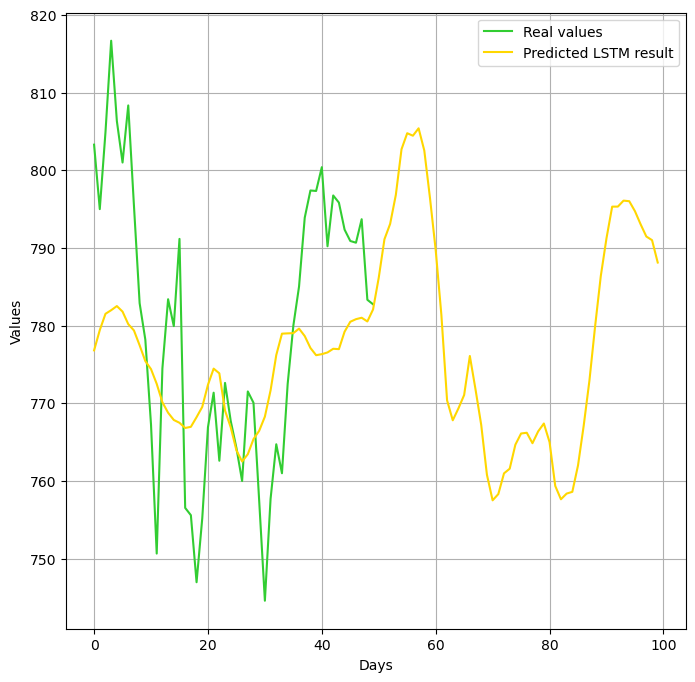

In [84]:
plt.figure(figsize=(8,8))
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_model2,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()